In [1]:
import pandas as pd

# Loading the dataset 
df = pd.read_csv("creditcard.csv")

# Displaying first 5 rows
print(df.head())

# Dataset structure
print(df.info())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

* Loaded the dataset and verified there are no missing values.
* Observed that the dataset is highly imbalanced (only 492 fraud cases out of 284,807).

In [2]:
# Checkinging for missing values
print("Missing Values:\n", df.isnull().sum())

# Checking class distribution
print("\nClass Distribution:\n", df['Class'].value_counts())


Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
 0    284315
1       492
Name: Class, dtype: int64


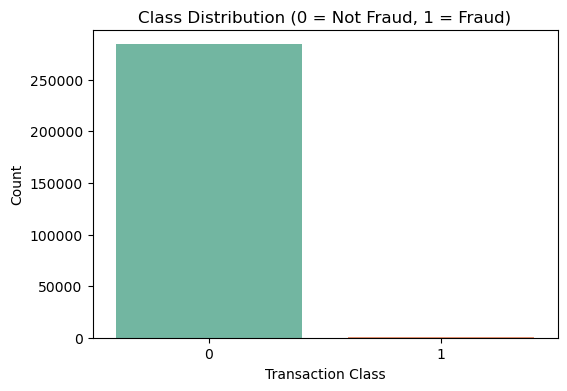

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='Set2')
plt.title("Class Distribution (0 = Not Fraud, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()


In [4]:
from sklearn.preprocessing import StandardScaler

# Creating a copy to avoid modifying original data
df_scaled = df.copy()

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
df_scaled[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']])

df_scaled.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [5]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_scaled.drop("Class", axis=1)
y = df_scaled["Class"]

# Train-test split (stratify=y ensures class balance in both sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (227845, 30)
Test set shape: (56962, 30)


* Separated data into features (X) and target (y).
* Split into training (80%) and testing (20%) sets.



In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Training logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
# Predictions
y_pred = log_reg.predict(X_test)
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[56851    13]
 [   34    64]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
Evaluated using Confusion Matrix and Classification Report.

Achieved good precision (0.83) and recall (0.65) for fraud class.

The dataset was highly imbalanced, with very few fraud cases.

I used logistic regression and focused on precision and recall, not just accuracy.

Scaling features like Amount improved the model's performance.

The confusion matrix helped me understand real vs. predicted frauds clearly.

